# PyTorch Workshop - session 03 - subsession 01
# An instroduction to CNNs in PyTorch

#Import Libraries and install packages

In [1]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 9.2 MB/s eta 0:00:00


In [78]:
# Torch Fundamental packages
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split

## Torch Vision
import torchvision
from torchvision.datasets import MNIST, CIFAR100
from torchvision import transforms as T

## General packages
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

from torchmetrics import Accuracy
from tqdm.notebook import tqdm

# Data

## Mnist

In [4]:
train_set1 = MNIST(root = './mnist', train = True, download = True)
test_set1 = MNIST(root = './mnist', train = False, download = True)

100%|██████████| 9912422/9912422 [00:00<00:00, 146931927.40it/s]

Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 50620849.91it/s]


Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 54159453.36it/s]


Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 9860522.14it/s]


Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



In [141]:
train_set1

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./mnist
    Split: Train

In [142]:
test_set1

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./mnist
    Split: Test

In [144]:
train_set1.data.shape

torch.Size([60000, 28, 28])

In [7]:
test_set1.data.shape

torch.Size([10000, 28, 28])

In [8]:
train_set1.data.shape

torch.Size([60000, 28, 28])

In [148]:
train_set1[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

## Cifar 100

In [150]:
transform_train = T.Compose([T.RandomCrop(32, padding=4),
                             T.RandomHorizontalFlip(),
                             T.ToTensor(), #0 - 1
                             T.Normalize(mean=(0.4914, 0.4822, 0.4465),
                                         std=(0.2023, 0.1994, 0.2010))]) # -3 , 3

transform_test = T.Compose([T.ToTensor(),
                            T.Normalize(mean=(0.4914, 0.4822, 0.4465),
                                        std=(0.2023, 0.1994, 0.2010))])

In [10]:
train_set = CIFAR100(root = './cifar100', train = True, download = True, transform= transform_train)
test_set = CIFAR100(root = './cifar100', train = False, download = True, transform = transform_test)

100%|██████████| 169001437/169001437 [00:03<00:00, 43644114.82it/s]


Extracting ./cifar100/cifar-100-python.tar.gz to ./cifar100
Files already downloaded and verified


In [151]:
train_set

Dataset CIFAR100
    Number of datapoints: 50000
    Root location: ./cifar100
    Split: Train
    StandardTransform
Transform: Compose(
               RandomCrop(size=(32, 32), padding=4)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )

In [152]:
test_set

Dataset CIFAR100
    Number of datapoints: 10000
    Root location: ./cifar100
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )

In [153]:
train_set.data.shape

(50000, 32, 32, 3)

In [154]:
train_set[0]

(tensor([[[ 2.5141,  2.5141,  2.5141,  ..., -2.4291, -2.4291, -2.4291],
          [ 2.5141,  2.5141,  2.5141,  ..., -2.4291, -2.4291, -2.4291],
          [ 2.5141,  2.5141,  2.5141,  ..., -2.4291, -2.4291, -2.4291],
          ...,
          [-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291],
          [-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291],
          [-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291]],
 
         [[ 2.5968,  2.5968,  2.5968,  ..., -2.4183, -2.4183, -2.4183],
          [ 2.5968,  2.5968,  2.5968,  ..., -2.4183, -2.4183, -2.4183],
          [ 2.5968,  2.5968,  2.5968,  ..., -2.4183, -2.4183, -2.4183],
          ...,
          [-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183],
          [-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183],
          [-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183]],
 
         [[ 2.7537,  2.7537,  2.7537,  ..., -2.2214, -2.2214, -2.2214],
          [ 2.7537,  2.7537,

In [155]:
train_set[0][0]

tensor([[[ 1.6805,  1.3510,  2.0101,  ...,  2.5141,  2.5141, -2.4291],
         [ 0.6919,  0.8664,  1.4091,  ...,  2.4947,  2.5141, -2.4291],
         [ 0.7888,  1.2347,  1.3122,  ...,  2.4947,  2.5141, -2.4291],
         ...,
         [-1.1690, -1.8475, -1.5955,  ...,  0.3236,  0.4399, -2.4291],
         [-0.5487, -2.0026, -1.8475,  ..., -0.1029, -0.0641, -2.4291],
         [-0.3936, -1.7700, -2.0608,  ..., -0.7232, -0.7426, -2.4291]],

        [[ 1.9871,  1.6134,  2.3018,  ...,  2.5968,  2.5968, -2.4183],
         [ 0.8858,  1.0431,  1.7314,  ...,  2.5771,  2.5968, -2.4183],
         [ 1.0824,  1.4954,  1.6724,  ...,  2.5771,  2.5968, -2.4183],
         ...,
         [-1.1989, -2.0839, -1.7889,  ...,  1.1611,  1.2201, -2.4183],
         [-0.2156, -2.1036, -2.0249,  ...,  0.6301,  0.6694, -2.4183],
         [ 0.1974, -1.7102, -2.2413,  ..., -0.0189, -0.0189, -2.4183]],

        [[ 1.7587,  1.5441,  2.3440,  ...,  2.7537,  2.7537, -2.2214],
         [ 0.3149,  0.7052,  1.5636,  ...,  2

In [156]:
train_set[0][0].shape

torch.Size([3, 32, 32])

In [157]:
train_set.classes

['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle',
 'bowl',
 'boy',
 'bridge',
 'bus',
 'butterfly',
 'camel',
 'can',
 'castle',
 'caterpillar',
 'cattle',
 'chair',
 'chimpanzee',
 'clock',
 'cloud',
 'cockroach',
 'couch',
 'crab',
 'crocodile',
 'cup',
 'dinosaur',
 'dolphin',
 'elephant',
 'flatfish',
 'forest',
 'fox',
 'girl',
 'hamster',
 'house',
 'kangaroo',
 'keyboard',
 'lamp',
 'lawn_mower',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'man',
 'maple_tree',
 'motorcycle',
 'mountain',
 'mouse',
 'mushroom',
 'oak_tree',
 'orange',
 'orchid',
 'otter',
 'palm_tree',
 'pear',
 'pickup_truck',
 'pine_tree',
 'plain',
 'plate',
 'poppy',
 'porcupine',
 'possum',
 'rabbit',
 'raccoon',
 'ray',
 'road',
 'rocket',
 'rose',
 'sea',
 'seal',
 'shark',
 'shrew',
 'skunk',
 'skyscraper',
 'snail',
 'snake',
 'spider',
 'squirrel',
 'streetcar',
 'sunflower',
 'sweet_pepper',
 'table',
 'tank',
 'telephone',
 'television',
 'tig

In [158]:
train_set.class_to_idx

{'apple': 0,
 'aquarium_fish': 1,
 'baby': 2,
 'bear': 3,
 'beaver': 4,
 'bed': 5,
 'bee': 6,
 'beetle': 7,
 'bicycle': 8,
 'bottle': 9,
 'bowl': 10,
 'boy': 11,
 'bridge': 12,
 'bus': 13,
 'butterfly': 14,
 'camel': 15,
 'can': 16,
 'castle': 17,
 'caterpillar': 18,
 'cattle': 19,
 'chair': 20,
 'chimpanzee': 21,
 'clock': 22,
 'cloud': 23,
 'cockroach': 24,
 'couch': 25,
 'crab': 26,
 'crocodile': 27,
 'cup': 28,
 'dinosaur': 29,
 'dolphin': 30,
 'elephant': 31,
 'flatfish': 32,
 'forest': 33,
 'fox': 34,
 'girl': 35,
 'hamster': 36,
 'house': 37,
 'kangaroo': 38,
 'keyboard': 39,
 'lamp': 40,
 'lawn_mower': 41,
 'leopard': 42,
 'lion': 43,
 'lizard': 44,
 'lobster': 45,
 'man': 46,
 'maple_tree': 47,
 'motorcycle': 48,
 'mountain': 49,
 'mouse': 50,
 'mushroom': 51,
 'oak_tree': 52,
 'orange': 53,
 'orchid': 54,
 'otter': 55,
 'palm_tree': 56,
 'pear': 57,
 'pickup_truck': 58,
 'pine_tree': 59,
 'plain': 60,
 'plate': 61,
 'poppy': 62,
 'porcupine': 63,
 'possum': 64,
 'rabbit': 65,

## DataLoader

In [20]:
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=128, shuffle=False)

In [21]:
len(train_loader)

782

In [22]:
x, y = next(iter(train_loader))
print(x.shape)
print(y)

torch.Size([64, 3, 32, 32])
tensor([54,  0, 79, 58, 38, 19,  5, 30, 49, 11, 94, 26, 89,  6, 88,  3,  4, 21,
        47, 30, 64, 30, 76, 14, 32, 69, 75, 27, 45, 53, 99, 60, 13, 39, 26, 61,
        99, 80, 57, 33, 88, 97, 89, 48, 98, 19,  3, 96, 79, 73, 50, 21, 95,  5,
        88, 60,  4, 82, 41, 14, 90, 95, 20, 68])


## Visualization

In [23]:
def normalize_image(image):
  image_min = image.min()
  image_max = image.max()
  image.clamp_(min = image_min, max = image_max)
  image.add_(-image_min).div_(image_max - image_min + 1e-5)
  return image

def plot_images(images, labels, classes, normalize=True):
  n_images = len(images)

  rows = int(np.sqrt(n_images))
  cols = int(np.sqrt(n_images))

  fig = plt.figure(figsize=(10, 10))

  for i in range(rows*cols):

    ax = fig.add_subplot(rows, cols, i+1)

    image = images[i]
    if normalize:
      image = normalize_image(image)

    ax.imshow(image.permute(1, 2, 0).cpu().numpy())
    ax.set_title(classes[labels[i]])
    ax.axis('off')

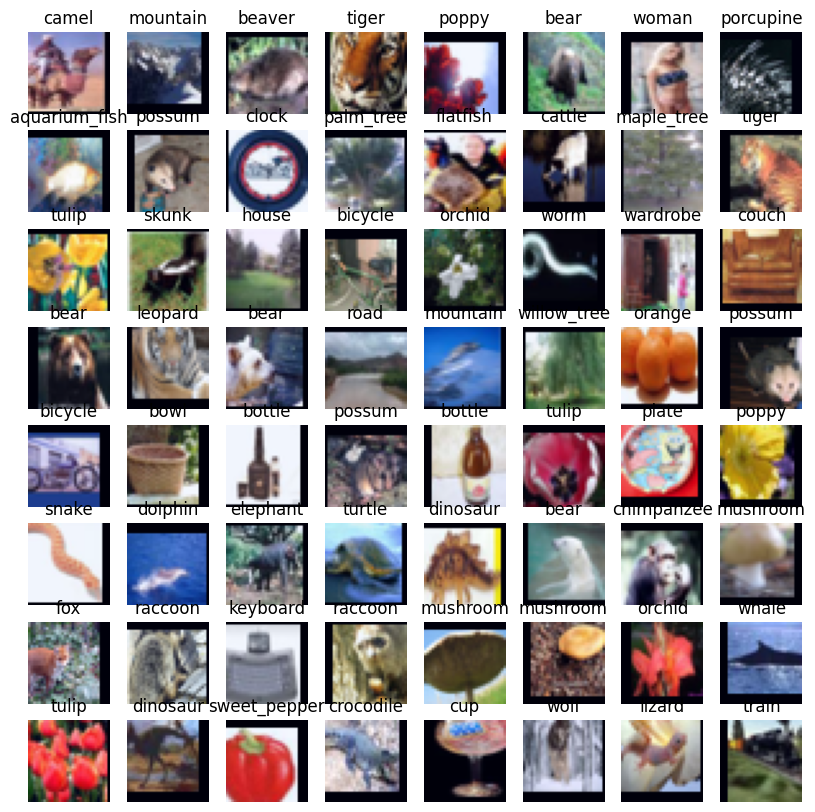

In [24]:
batch = next(iter(train_loader))
classes = train_set.classes
plot_images(batch[0], batch[1], classes)

## Net

### Conv2d and pooling

In [25]:
x = torch.randn((1,3,32,32)).cuda(0)
x.shape

torch.Size([1, 3, 32, 32])

In [26]:
layer = nn.Conv2d(in_channels = 3, out_channels= 64, kernel_size= 3, stride = 1, padding = 1).cuda(0)

output = layer(x)

output.shape

torch.Size([1, 64, 32, 32])

In [27]:
layer2 = nn.Conv2d(in_channels = 3, out_channels= 64, kernel_size= 3, stride = 2, padding = 1).cuda(0)

output = layer2(x)

output.shape

torch.Size([1, 64, 16, 16])

In [28]:
layer3 = nn.Conv2d(in_channels = 3, out_channels= 64, kernel_size= 3, stride = 2).cuda(0)

output = layer3(x)

output.shape

torch.Size([1, 64, 15, 15])

In [29]:
pool = nn.MaxPool2d(kernel_size = 2, stride = 2)

output = pool(x)

output.shape

torch.Size([1, 3, 16, 16])

In [30]:
avgpool = nn.MaxPool2d(kernel_size = 2, stride = 2)

output = avgpool(x)

output.shape

torch.Size([1, 3, 16, 16])

In [31]:
aavgpool = nn.AdaptiveAvgPool2d(output_size=(1,1))

output = aavgpool(x)

output.shape

torch.Size([1, 3, 1, 1])

### main net

In [106]:
def mycnn():

  model = nn.Sequential(nn.Conv2d(3, 64, 3, padding=1),
                          nn.BatchNorm2d(64),
                          nn.ReLU(),

                          nn.Conv2d(64, 64, 3, padding=1),
                          nn.BatchNorm2d(64),
                          nn.ReLU(),

                          nn.MaxPool2d(2, 2), # BS x64 x16 x16 #this pooling operator halves the feature map

                          nn.Conv2d(64, 128, 3, padding=1),
                          nn.BatchNorm2d(128),
                          nn.ReLU(),

                          nn.Conv2d(128, 128, 3, padding=1),
                          nn.BatchNorm2d(128),
                          nn.ReLU(),

                          nn.MaxPool2d(2,2), # 8 x 8

                          nn.Conv2d(128, 256, 3, padding=1),
                          nn.BatchNorm2d(256),
                          nn.ReLU(),

                          nn.Conv2d(256, 256, 3, padding=1), # BSx 256 x8 x8
                          nn.BatchNorm2d(256),
                          nn.ReLU(),
                          # BS x256 x1 x1
                          nn.AdaptiveAvgPool2d(output_size=(1, 1)),

                          nn.Flatten(), # BSx256
                          nn.Linear(256, 512),
                          nn.Dropout1d(0.3),

                          nn.Linear(512, 100)
                      )
  return model

In [107]:
model = mycnn()

In [108]:
output = model(torch.randn((1,3,32,32)))

In [109]:
output.shape

torch.Size([1, 100])

In [110]:
def num_params(model):
  nums = sum(p.numel() for p in model.parameters())/1e6
  return nums

In [111]:
num_params(model)

1.330084

### main net with functional structure (students task)

In [112]:
def conv3x3_bn_af(in_channels, out_channels):
  module = nn.Sequential(nn.Conv2d(in_channels, out_channels, 3, padding=1),
                         nn.BatchNorm2d(out_channels),
                         nn.ReLU())
  return module

In [113]:
def CNN():
  feature_sizes = [3,64,128]
  model = nn.Sequential(conv3x3_bn_af(3,64))
  return model

## Utils and Device

In [114]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = mycnn().to(device)

In [115]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

## optim and loss

In [116]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

## Train Loops (Version 2)

### Train_one_epoch
https://pytorch.org/tutorials/beginner/introyt/trainingyt.html

In [117]:
def train_one_epoch(model, train_loader, criterion, optimizer, epoch=None):
  model.train()

  loss_train = AverageMeter()
  acc_train = Accuracy(task='multiclass', num_classes=100).to(device)
  with tqdm(train_loader, unit="batch") as tepoch: ## Define a variable based on train_loader as tepoch
    for inputs, labels in tepoch: # Just like the enumerate
      if epoch is not None:
        tepoch.set_description(f"Epoch {epoch}") # show the epoch number

      inputs = inputs.to(device)
      labels = labels.to(device)

      outputs = model(inputs)

      loss = criterion(outputs, labels)

      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

      loss_train.update(loss.item())
      acc_train(outputs, labels.int())

      tepoch.set_postfix(loss=loss_train.avg,
                         accuracy=100.*acc_train.compute().item()) ## show the train loss and accuracy
  return model, loss_train.avg, acc_train.compute().item()

## Validation (one epoch)

In [118]:
def validation(model, test_loader, loss_fn):
  model.eval()
  with torch.no_grad():
    loss_valid = AverageMeter()
    acc_valid = Accuracy(task='multiclass', num_classes=100).to(device)
    for i, (inputs, targets) in enumerate(test_loader):
      inputs = inputs.to(device)
      targets = targets.to(device)

      outputs = model(inputs)
      loss = loss_fn(outputs, targets)

      loss_valid.update(loss.item())
      acc_valid(outputs, targets.int())
  return loss_valid.avg, acc_valid.compute().item()

## Hyper parameter tuning

https://web.eecs.umich.edu/~justincj/teaching/eecs498/FA2020/

https://www.youtube.com/playlist?list=PL80I41oVxglKcAHllsU0txr3OuTTaWX2v

https://howsam.org/


### check the forward propagation

In [119]:
x_batch, y_batch = next(iter(train_loader))


outputs = model(x_batch.to(device))


loss = criterion(outputs, y_batch.to(device))
print(loss)

tensor(4.6269, device='cuda:0', grad_fn=<NllLossBackward0>)


### check the Backward propagation (Overfit your model on sample dataset)

In [120]:
_ , mini_dataset = random_split(train_set, (len(train_set)-1000, 1000))
mini_loader = DataLoader(mini_dataset, 20)

In [121]:
num_epochs = 30
for epoch in range(num_epochs):
  model, _, _ = train_one_epoch(model, mini_loader, criterion, optimizer, epoch)

  0%|          | 0/50 [00:00<?, ?batch/s]

  0%|          | 0/50 [00:00<?, ?batch/s]

  0%|          | 0/50 [00:00<?, ?batch/s]

  0%|          | 0/50 [00:00<?, ?batch/s]

  0%|          | 0/50 [00:00<?, ?batch/s]

  0%|          | 0/50 [00:00<?, ?batch/s]

  0%|          | 0/50 [00:00<?, ?batch/s]

  0%|          | 0/50 [00:00<?, ?batch/s]

  0%|          | 0/50 [00:00<?, ?batch/s]

  0%|          | 0/50 [00:00<?, ?batch/s]

  0%|          | 0/50 [00:00<?, ?batch/s]

  0%|          | 0/50 [00:00<?, ?batch/s]

  0%|          | 0/50 [00:00<?, ?batch/s]

  0%|          | 0/50 [00:00<?, ?batch/s]

  0%|          | 0/50 [00:00<?, ?batch/s]

  0%|          | 0/50 [00:00<?, ?batch/s]

  0%|          | 0/50 [00:00<?, ?batch/s]

  0%|          | 0/50 [00:00<?, ?batch/s]

  0%|          | 0/50 [00:00<?, ?batch/s]

  0%|          | 0/50 [00:00<?, ?batch/s]

  0%|          | 0/50 [00:00<?, ?batch/s]

  0%|          | 0/50 [00:00<?, ?batch/s]

  0%|          | 0/50 [00:00<?, ?batch/s]

  0%|          | 0/50 [00:00<?, ?batch/s]

  0%|          | 0/50 [00:00<?, ?batch/s]

  0%|          | 0/50 [00:00<?, ?batch/s]

  0%|          | 0/50 [00:00<?, ?batch/s]

  0%|          | 0/50 [00:00<?, ?batch/s]

  0%|          | 0/50 [00:00<?, ?batch/s]

  0%|          | 0/50 [00:00<?, ?batch/s]

### Choose the best learning rate and weight decay (l2 reg)

In [102]:
model

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU()
  (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (9): ReLU()
  (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): ReLU()
  (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (14): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): BatchNorm2d(256, eps=1e-05, momentum

In [124]:
num_epochs = 3
for lr in [0.5, 0.1, 0.01, 0.001]:
  print(f'LR={lr}')
  #mymodel = network.to(device) # define model from scratch per each epoch
  model = mycnn().to(device)
  optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=1e-4) # define optimizer from scratch per each epoch
  for epoch in range(num_epochs):
    model, _, _ = train_one_epoch(model, train_loader, criterion, optimizer, epoch)
  print()

LR=0.5


  0%|          | 0/782 [00:00<?, ?batch/s]

  0%|          | 0/782 [00:00<?, ?batch/s]

  0%|          | 0/782 [00:00<?, ?batch/s]


LR=0.1


  0%|          | 0/782 [00:00<?, ?batch/s]

  0%|          | 0/782 [00:00<?, ?batch/s]

  0%|          | 0/782 [00:00<?, ?batch/s]


LR=0.01


  0%|          | 0/782 [00:00<?, ?batch/s]

  0%|          | 0/782 [00:00<?, ?batch/s]

  0%|          | 0/782 [00:00<?, ?batch/s]


LR=0.001


  0%|          | 0/782 [00:00<?, ?batch/s]

  0%|          | 0/782 [00:00<?, ?batch/s]

  0%|          | 0/782 [00:00<?, ?batch/s]

In [125]:
num_epochs = 2

for lr in [0.08, 0.09, 0.1, 0.15, 0.2]:
  for wd in [1e-4, 1e-5, 0.]:
    mymodel = mycnn().to(device)
    optimizer = optim.SGD(mymodel.parameters(), lr=lr, weight_decay=wd)
    print(f'LR={lr}, WD={wd}')

    for epoch in range(num_epochs):
      model, loss, _ = train_one_epoch(mymodel, train_loader, criterion, optimizer, epoch)
    print()

LR=0.08, WD=0.0001


  0%|          | 0/782 [00:00<?, ?batch/s]

  0%|          | 0/782 [00:00<?, ?batch/s]


LR=0.08, WD=1e-05


  0%|          | 0/782 [00:00<?, ?batch/s]

  0%|          | 0/782 [00:00<?, ?batch/s]


LR=0.08, WD=0.0


  0%|          | 0/782 [00:00<?, ?batch/s]

  0%|          | 0/782 [00:00<?, ?batch/s]


LR=0.09, WD=0.0001


  0%|          | 0/782 [00:00<?, ?batch/s]

  0%|          | 0/782 [00:00<?, ?batch/s]


LR=0.09, WD=1e-05


  0%|          | 0/782 [00:00<?, ?batch/s]

  0%|          | 0/782 [00:00<?, ?batch/s]


LR=0.09, WD=0.0


  0%|          | 0/782 [00:00<?, ?batch/s]

  0%|          | 0/782 [00:00<?, ?batch/s]


LR=0.1, WD=0.0001


  0%|          | 0/782 [00:00<?, ?batch/s]

  0%|          | 0/782 [00:00<?, ?batch/s]


LR=0.1, WD=1e-05


  0%|          | 0/782 [00:00<?, ?batch/s]

  0%|          | 0/782 [00:00<?, ?batch/s]


LR=0.1, WD=0.0


  0%|          | 0/782 [00:00<?, ?batch/s]

  0%|          | 0/782 [00:00<?, ?batch/s]


LR=0.15, WD=0.0001


  0%|          | 0/782 [00:00<?, ?batch/s]

  0%|          | 0/782 [00:00<?, ?batch/s]


LR=0.15, WD=1e-05


  0%|          | 0/782 [00:00<?, ?batch/s]

  0%|          | 0/782 [00:00<?, ?batch/s]


LR=0.15, WD=0.0


  0%|          | 0/782 [00:00<?, ?batch/s]

  0%|          | 0/782 [00:00<?, ?batch/s]


LR=0.2, WD=0.0001


  0%|          | 0/782 [00:00<?, ?batch/s]

  0%|          | 0/782 [00:00<?, ?batch/s]


LR=0.2, WD=1e-05


  0%|          | 0/782 [00:00<?, ?batch/s]

  0%|          | 0/782 [00:00<?, ?batch/s]


LR=0.2, WD=0.0


  0%|          | 0/782 [00:00<?, ?batch/s]

  0%|          | 0/782 [00:00<?, ?batch/s]

## Train your best model for more epochs

In [126]:
model = mycnn().to(device)

In [127]:
lr = 0.05
wd = 1e-4
optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=wd)

In [128]:
loss_train_hist = []
loss_valid_hist = []

acc_train_hist = []
acc_valid_hist = []

best_loss_valid = torch.inf
epoch_counter = 0

In [138]:
num_epochs = 10

for epoch in range(num_epochs):
  # Train Section
  model, loss_train, acc_train = train_one_epoch(model,
                                                 train_loader,
                                                 criterion,
                                                 optimizer,
                                                 epoch)
  # Validation Section
  loss_validation, acc_valid = validation(model,
                                     test_loader,
                                     criterion)

  # loss and accuracy is appended into their pre-defined lists
  loss_train_hist.append(loss_train)
  loss_valid_hist.append(loss_validation)

  acc_train_hist.append(acc_train)
  acc_valid_hist.append(acc_valid)

  # Save Model based on Criteria (loss)
  if loss_validation < best_loss_valid:
    torch.save(model, f'model.pt')
    print(f'your best model for epoch number: {epoch} is saved!')
    best_loss_valid = loss_validation

  # Show the accuracy and loss for validation per epochs
  print(f'Valid: Loss = {loss_validation:.4}, Acc = {acc_valid:.4}')
  print()

  epoch_counter += 1

  0%|          | 0/782 [00:00<?, ?batch/s]

Valid: Loss = 1.419, Acc = 0.6422



  0%|          | 0/782 [00:00<?, ?batch/s]

Valid: Loss = 1.944, Acc = 0.5663



  0%|          | 0/782 [00:00<?, ?batch/s]

Valid: Loss = 1.528, Acc = 0.6225



  0%|          | 0/782 [00:00<?, ?batch/s]

Valid: Loss = 1.714, Acc = 0.5986



  0%|          | 0/782 [00:00<?, ?batch/s]

Valid: Loss = 1.385, Acc = 0.6473



  0%|          | 0/782 [00:00<?, ?batch/s]

Valid: Loss = 2.444, Acc = 0.5085



  0%|          | 0/782 [00:00<?, ?batch/s]

Valid: Loss = 1.827, Acc = 0.5909



  0%|          | 0/782 [00:00<?, ?batch/s]

Valid: Loss = 1.889, Acc = 0.5865



  0%|          | 0/782 [00:00<?, ?batch/s]

Valid: Loss = 1.746, Acc = 0.6073



  0%|          | 0/782 [00:00<?, ?batch/s]

Valid: Loss = 1.806, Acc = 0.5936



  0%|          | 0/782 [00:00<?, ?batch/s]

Valid: Loss = 1.519, Acc = 0.6233



  0%|          | 0/782 [00:00<?, ?batch/s]

Valid: Loss = 1.866, Acc = 0.5748



  0%|          | 0/782 [00:00<?, ?batch/s]

Valid: Loss = 1.511, Acc = 0.6345



  0%|          | 0/782 [00:00<?, ?batch/s]

Valid: Loss = 1.456, Acc = 0.6452



  0%|          | 0/782 [00:00<?, ?batch/s]

Valid: Loss = 1.834, Acc = 0.5942



  0%|          | 0/782 [00:00<?, ?batch/s]

Valid: Loss = 1.793, Acc = 0.5896



  0%|          | 0/782 [00:00<?, ?batch/s]

Valid: Loss = 2.362, Acc = 0.5378



  0%|          | 0/782 [00:00<?, ?batch/s]

Valid: Loss = 1.663, Acc = 0.6097



  0%|          | 0/782 [00:00<?, ?batch/s]

Valid: Loss = 1.698, Acc = 0.6072



  0%|          | 0/782 [00:00<?, ?batch/s]

Valid: Loss = 1.529, Acc = 0.6297



  0%|          | 0/782 [00:00<?, ?batch/s]

Valid: Loss = 1.859, Acc = 0.5856



  0%|          | 0/782 [00:00<?, ?batch/s]

Valid: Loss = 1.721, Acc = 0.5969



  0%|          | 0/782 [00:00<?, ?batch/s]

Valid: Loss = 1.598, Acc = 0.6225



  0%|          | 0/782 [00:00<?, ?batch/s]

Valid: Loss = 1.653, Acc = 0.611



  0%|          | 0/782 [00:00<?, ?batch/s]

Valid: Loss = 1.685, Acc = 0.6182



  0%|          | 0/782 [00:00<?, ?batch/s]

Valid: Loss = 1.828, Acc = 0.59



  0%|          | 0/782 [00:00<?, ?batch/s]

Valid: Loss = 1.501, Acc = 0.6413



  0%|          | 0/782 [00:00<?, ?batch/s]

Valid: Loss = 2.308, Acc = 0.5319



  0%|          | 0/782 [00:00<?, ?batch/s]

Valid: Loss = 2.059, Acc = 0.5687



  0%|          | 0/782 [00:00<?, ?batch/s]

Valid: Loss = 1.67, Acc = 0.6207



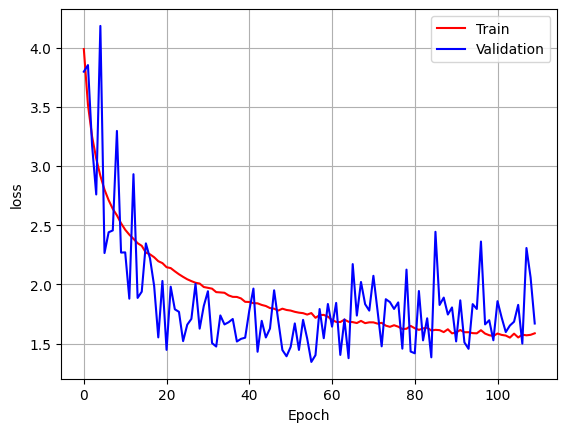

In [139]:
plt.plot(range(epoch_counter), loss_train_hist, 'r-', label='Train')
plt.plot(range(epoch_counter), loss_valid_hist, 'b-', label='Validation')

plt.xlabel('Epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

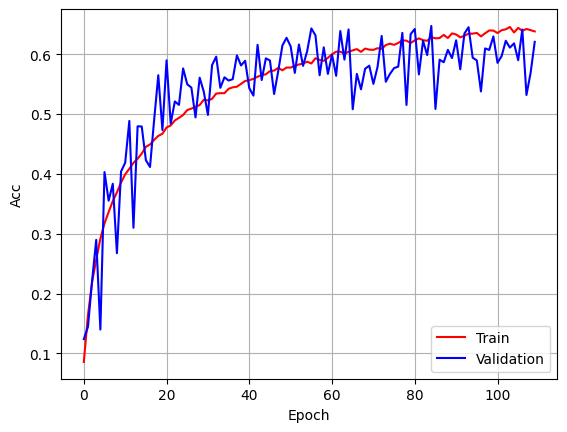

In [140]:
plt.plot(range(epoch_counter), acc_train_hist, 'r-', label='Train')
plt.plot(range(epoch_counter), acc_valid_hist, 'b-', label='Validation')

plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.grid(True)
plt.legend()

## Evaluation